# DEEP TRANSFER LEARNING
Pemanfaatan Deep Transfer Learning yaitu melakukan peningkatan tugas dari tugas sebelumnya. tugas sebelumnya adalah mengidentifiksi fitur fitur ada object ( menghasilkan dataset vgg16 ) lalu sekarang mengenali objek pada gambar

In [ ]:
#Import library yang dibutuhkan
import requests
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from keras.applications.efficientnet_v2 import EfficientNetV2M
from keras.applications.mobilenet_v2 import MobileNetV2


dataset yang saya gunakan adalah VGG 16 memiliki target 1000 kelas, bisa di akses di link berikut
https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a

berisi fitur fitur untuk mendeteksi berbagai macam objek



In [ ]:
model = EfficientNetV2M()  #variabe kan model
model.summary() #menampilkan layer-layer model VGG16

219330792/219330792 [==============================] - 2s 0us/step
Model: "efficientnetv2-m"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 480, 480, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 480, 480, 3)  0           ['input_1[0][0]']                
                                                                                                  
 stem_conv (Conv2D)             (None, 240, 240, 24  648         ['rescaling[0][0]']              
                                )                                                                 
                

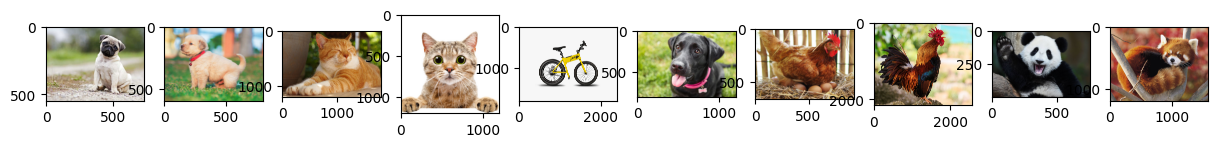

(10, 480, 480, 3)


In [ ]:
urls=[]
urls.append("https://post.healthline.com/wp-content/uploads/2020/08/3180-Pug_green_grass-732x549-thumbnail-732x549.jpg")
urls.append("https://static.toiimg.com/thumb/msid-60132235,imgsize-169468,width-800,height-600,resizemode-75/60132235.jpg")
urls.append("https://img.webmd.com/dtmcms/live/webmd/consumer_assets/site_images/article_thumbnails/other/cat_relaxing_on_patio_other/1800x1200_cat_relaxing_on_patio_other.jpg")
urls.append("https://i.guim.co.uk/img/media/26392d05302e02f7bf4eb143bb84c8097d09144b/446_167_3683_2210/master/3683.jpg?width=1200&height=1200&quality=85&auto=format&fit=crop&s=49ed3252c0b2ffb49cf8b508892e452d")
urls.append("https://media.wired.com/photos/61afb905d184762c75e00411/master/pass/Gear-Jackbrabbit-Bike-Yellow-top.jpg")
urls.append("https://cdn.mos.cms.futurecdn.net/ZvueiLL2vdwoHWHjCRuQCW-1200-80.jpg")
urls.append("https://images.theconversation.com/files/239356/original/file-20181004-52660-1fosymz.jpg?ixlib=rb-1.1.0&rect=121%2C5%2C3214%2C2309&q=45&auto=format&w=926&fit=clip")
urls.append("https://www.thesun.co.uk/wp-content/uploads/2019/09/NINTCHDBPICT000492607142-e1567357146264.jpg")
urls.append("https://asset.kompas.com/crops/ncgvDkq11ovx_624dxbv483x_iY=/0x0:648x432/750x500/data/photo/2021/10/05/615c371c61b81.jpg")
urls.append("https://wallpaperaccess.com/full/3396763.jpg")

imgs=[]
plt.figure(figsize=(15,6))
for u in range(0,len(urls)):
  r = requests.get(urls[u], stream=True) #Download
  img = np.array(Image.open(r.raw))  #Konversi ke NP Array
  plt.subplot(1,len(urls),u+1) #Menampilkan ke matplotlib
  plt.imshow(img) #Menampilkan ke matplotlib
  img = cv2.resize(img, (480,480)) #Resize sesuai input VGG 16
  imgs.append(img) #Kumpulkan semua image yang telah di preproses ke imgs
plt.show() #Menampilkan ke matplotlib
imgs = np.array(imgs) #Konversi ke Np Array
print (imgs.shape) #Debuging

In [ ]:
yh = model.predict(imgs)
for i in range(len(urls)):
  if(np.argmax(yh[i]) >= 151 and np.argmax(yh[i])<=268 ):
      print("Anjing")
  elif(np.argmax(yh[i]) >= 281 and np.argmax(yh[i])<=287 ) :
      print("Kucing")
  elif(np.argmax(yh[i]) >= 7 and np.argmax(yh[i])<=8 ) :
      print("Ayam")
  elif(np.argmax(yh[i]) >= 387 and np.argmax(yh[i]) <=388):
      print("Panda")
  elif(np.argmax(yh[i]) == 671):
      print("Sepeda")
  elif(np.argmax(yh[i]) == 620):
      print("Laptop")
  else:
      print("Lainya / belum di deskripsikan")

1/1 [==============================] - 14s 14s/step
Anjing
Anjing
Kucing
Kucing
Sepeda
Anjing
Ayam
Ayam
Panda
Panda


In [ ]:
yh.shape

(10, 1000)

## Silahkan coba untuk mencoba mendeteksi gambar
namun baru ada beberapa hewan yang di cantumkan

Silahkan masukkan link gambar (pastikan bentuk gambar .jpg/jpeg dll)
https://www.baliekbis.com/wp-content/uploads/2019/03/CF210013-EAFC-4A5F-9AA4-337E235E53E5.jpeg
----------------------------------------------------------------------------------------------
Berikut hasil dari link yang anda berikan:


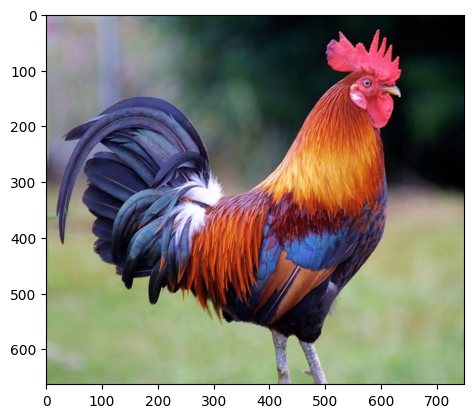

(1, 480, 480, 3)
1/1 [==============================] - 0s 42ms/step
-------------------------------------------------------------------------
Ini adalah Ayam


In [ ]:
# Silahkan Coba dengan memasukkan URL gambar hewan
print("Silahkan masukkan link gambar (pastikan bentuk gambar .jpg/jpeg dll)")
image = input("")
image_urls = [image]

# https://www.baliekbis.com/wp-content/uploads/2019/03/CF210013-EAFC-4A5F-9AA4-337E235E53E5.jpeg

images = []
for u, image_url in enumerate(image_urls):
    r = requests.get(image_url, stream=True)  # download gambar
    if r.status_code == 200:
        img = np.array(Image.open(r.raw))  # Konversi ke NP Array
        plt.subplot(1, len(image_urls), u + 1)  # Menampilkan ke matplotlib
        plt.imshow(img)  # Menampilkan ke matplotlib
        img = cv2.resize(img, (480, 480))  # Resize sesuai input VGG 16
        images.append(img)  # Kumpulkan semua gambar yang telah di preproses
    else:
        print(f"Terjadi kesalahan dalam mengunduh gambar dari {image_url}\n coba periksa kembali link yang diberikan")

strip = len(image)
print("-"*strip)
print("Berikut hasil dari link yang anda berikan:" )

plt.show()  # Menampilkan ke matplotlib
images = np.array(images)  # Konversi ke Np Array
print(images.shape)  # Debuging
yh = model.predict(images)
print("----------------------------------------------------")
for i in range(len(images)):
  if(np.argmax(yh[i]) >= 151 and np.argmax(yh[i])<=268 ):
      print("Ini adalah Anjing")
  elif(np.argmax(yh[i]) >= 281 and np.argmax(yh[i])<=287 ) :
      print("Ini adalah  Kucing")
  elif(np.argmax(yh[i]) >= 7 and np.argmax(yh[i])<=8 ) :
      print("Ini adalah Ayam")
  elif(np.argmax(yh[i]) >= 387 and np.argmax(yh[i]) <=388):
      print("Ini adalah Panda")
  elif(np.argmax(yh[i]) == 671):
      print("Ini adalah Sepeda")
  elif(np.argmax(yh[i]) == 620):
      print("Ini adalah Laptop")
  else:
      print("Lainya / belum di deskripsikan")